# Titanic Classification Kaggle Challenge

## Part 1: Data Analysis

In [1]:
# Libaries for data analysis
import pandas as pd
import numpy as np

# For graphing
import matplotlib.pyplot as plt
import seaborn as sns

# To avoid seeing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing data set
dataset = pd.read_csv('../data/train.csv')

Let's take a sneak peak of the top 5 rows of the dataset

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can also take a look at the different columns of our dataset

In [4]:
print(dataset.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


#### Info from Kaggle
More information available at https://www.kaggle.com/c/titanic/data  
- PassengerId: Unique ID of passenger  
- Survived: 0 = Did not survive, 1= Did Survive  
- Pclass: Ticket Class; 1 = 1st (Upper), 2 = 2nd (Middle), 3  = 3rd (Lower)  
- Name: Name of passenger  
- Sex: Gender of passenger  
- Age: Age of passenger in years  
- SibSp: # of siblings/spouses aboard the Titanic  
- Parch: # of parents/children aboard the Titanic  
- Ticket: Ticket number  
- Fare: Passenger fare  
- Cabin: Cabin number  
- Embarked: Port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton  

Categorical Features: Survived, Pclass, Sex, Embarked  
Non-Categorical: PassengerId, Name, Age, SibSp, Parch, Ticket, Fare, Cabin

#### Consider the columns of the dataset in more detail below:

In [5]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We see that we are missing data for the age column for 177 passengers.
In fact, let's see exactly which columns have missing values.

In [6]:
dataset.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

We see that we have missing values for 'Age', 'Cabin', and 'Embarked'.  
We will impute missing values later.

### Visualizing the Dataset

#### Visualizing Survival Information

The number of survivors is 342
The number of people who did not survive is 549


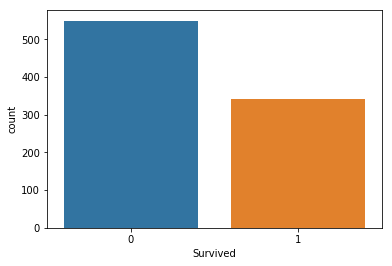

In [7]:
sns.countplot(x='Survived', data=dataset)
num_survived = (dataset['Survived'] == 1).sum()
num_died = (dataset['Survived'] == 0).sum()

print('The number of survivors is', num_survived)
print('The number of people who did not survive is', num_died)

We see that there were more people who died than those who survived (549 vs 342).

#### Visualizing Sex(Gender) Information

The number of males is 577
The number of females is 314


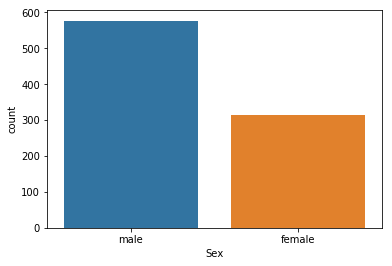

In [8]:
sns.countplot(x='Sex', data=dataset)
num_male = (dataset['Sex'] == 'male').sum()
num_female = (dataset['Sex'] == 'female').sum()

print('The number of males is', num_male)
print('The number of females is', num_female)

As the graph shows, there were almost twice as many males than females (577 vs 314).

#### Visualizing Pclass Information

The number of Pclass 1 passengers is 216
The number of Pclass 2 passengers is 184
The number of Pclass 3 passengers is 491


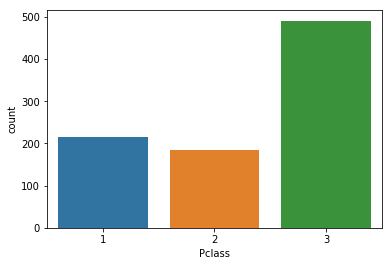

In [9]:
sns.countplot(x='Pclass', data=dataset)
num_pclass1 = (dataset['Pclass'] == 1).sum()
num_pclass2 = (dataset['Pclass'] == 2).sum()
num_pclass3 = (dataset['Pclass'] == 3).sum()

print('The number of Pclass 1 passengers is', num_pclass1)
print('The number of Pclass 2 passengers is', num_pclass2)
print('The number of Pclass 3 passengers is', num_pclass3)

As we can see, there were a lot more Pclass 3 passengers than the other two Pclasses.  
In fact, there were more Pclass 3 passengers than the other two combined (491 vs 216, 184).

#### Visualizing Embarked Information

The number of passengers who embarked at Southampton(S) is 644
The number of passengers who embarked at Cherbourg(C) is 168
The number of passengers who embarked at Queenstown(Q) is 77


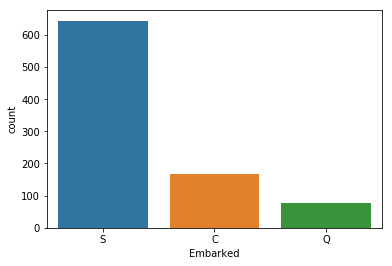

In [10]:
sns.countplot(x='Embarked', data=dataset)
num_embarkedS = (dataset['Embarked'] == 'S').sum()
num_embarkedC = (dataset['Embarked'] == 'C').sum()
num_embarkedQ = (dataset['Embarked'] == 'Q').sum()

print('The number of passengers who embarked at Southampton(S) is', num_embarkedS)
print('The number of passengers who embarked at Cherbourg(C) is', num_embarkedC)
print('The number of passengers who embarked at Queenstown(Q) is', num_embarkedQ)

We can see that more than 70% of the passengers embarked at Southampton(644), while the other two had significantly less passengers (Cherbourg with 168, Queenstown with 77). 

### Relationship between some Categorical Data and Survival

We will now add a 'NotSurvived' column for graphing purposes.

In [11]:
dataset['NotSurvived'] = 1 - dataset['Survived']

#### Relationship between Sex and Survival

,Survived
Sex,
female,0.742038
male,0.188908


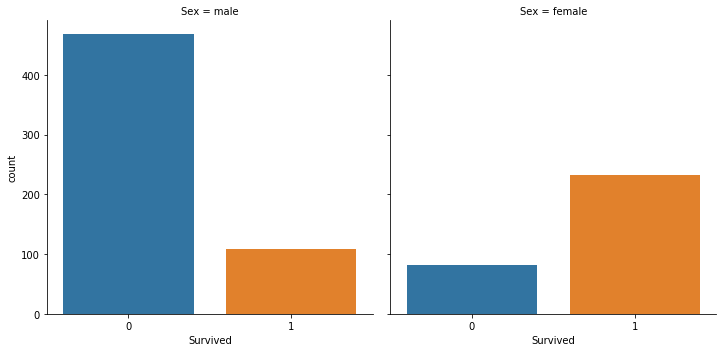

In [12]:
sns.catplot(x='Survived', col='Sex', kind='count', data=dataset)
dataset[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

We see that in out dataset, around 74% of females survived while only around 19% of males survived. Maybe female passengers were more likely to survive, due to the "Women and children first!" code of conduct.

To get a better look at the comparison, we will plot a graph with the survival ratio for each gender.

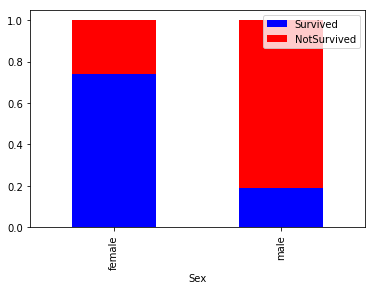

In [13]:
dataset.groupby('Sex').agg('mean')[['Survived', 'NotSurvived']].plot(kind='bar', stacked=True, colors = ['b', 'r'])

#### Relationship between Pclass and Survival

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


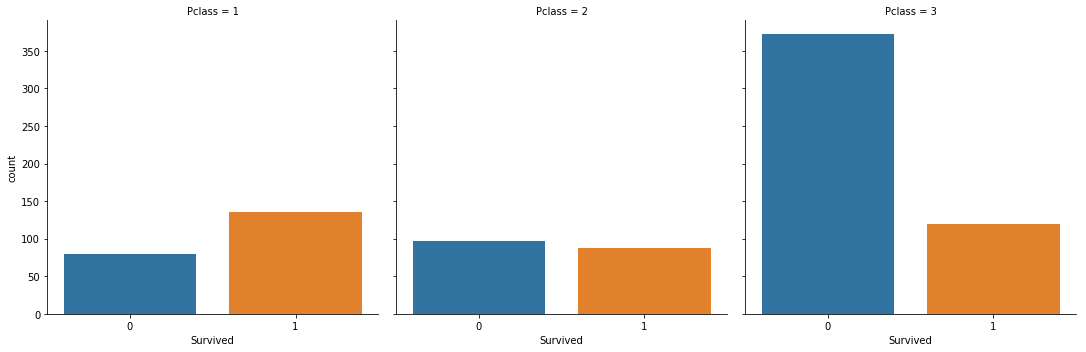

In [14]:
sns.catplot(x='Survived', col='Pclass', kind='count', data=dataset)
dataset[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

As the table shows, around 63% of Pclass 1 passengers survived, around 47% of Pclass 2 passengers survived, while only 24% of Pclass 3 passengers survived.

Pclass represents the class of the tickets (1 being the highest), and it is interesting to see how the passengers with the highest ticket class had the highest chances of survival. 
Having a higher class of ticket could indicate more wealth, which could have contributed to surviving on the Titanic.

We confirm that having a higher Pclass indicates that the passenger's fare will also tend to be higher. The table gives the mean fare for each Pclass.

In [15]:
dataset[['Pclass', 'Fare']].groupby(['Pclass']).mean().sort_values(by='Fare', ascending=False)

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


Clearly, the average ticket price for Pclass 1 is significantly greater than the average ticket price for the other Pclasses.

Again we plot graph with a ratio of survived vs notsurvived for each Pclass.

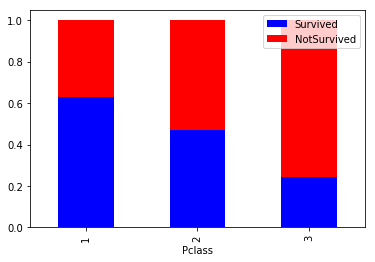

In [16]:
dataset.groupby('Pclass').agg('mean')[['Survived', 'NotSurvived']].plot(kind='bar', stacked=True, colors = ['b', 'r'])

#### Relationship between Embarked and Survival

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


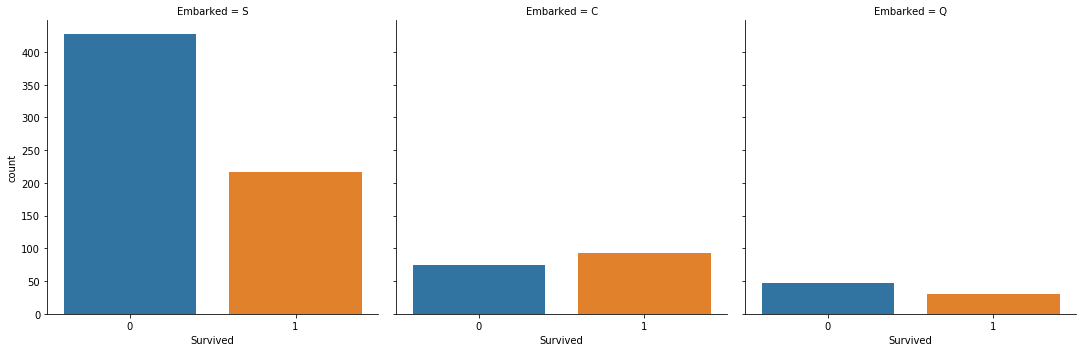

In [17]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=dataset)
dataset[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)

We can see that those who embarked at S has the lowest chance of survival compared to the other two. 

Again we look at the graph with the ratio.

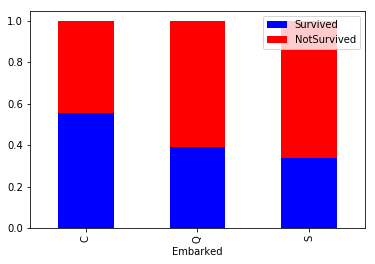

In [18]:
dataset.groupby('Embarked').agg('mean')[['Survived', 'NotSurvived']].plot(kind='bar', stacked=True, colors = ['b', 'r'])

We now compare embarked and fare. 

In [19]:
dataset[['Embarked', 'Fare']].groupby(['Embarked']).mean().sort_values(by='Fare', ascending=False)

,Fare
Embarked,
C,59.954144
S,27.079812
Q,13.276030


Interestingly, the embarked site with the highest average fare (C) has the highest survival rate. 

### Relationship between some Non-Categorical Data and Survival

#### Function for drawing overlapping histograms that we will frequently use


In [20]:
def draw_survival_histogram(var1, var2, xlab, title, gbins = np.linspace(0, 80, 10), ylim_top = None):
    if ylim_top:
        plt.ylim(top=ylim_top)
        
    ylab = 'Number of Passengers'
    bins = gbins
    plt.hist([var1, var2], bins, color=['red','green'], label=['Did Not Survive', 'Survived'])
    plt.legend(loc='upper right')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.show()

#### Relationship between Age, Sex and Survival

#### Age vs Survival (Overall)

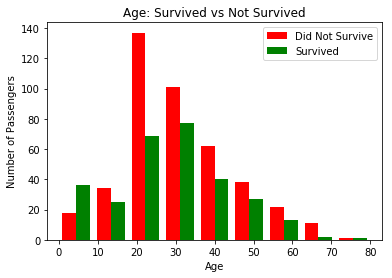

In [21]:
age_notSurvived = dataset['Age'].where(dataset['Survived']==0)
age_survived = dataset['Age'].where(dataset['Survived']==1)

draw_survival_histogram(age_notSurvived, age_survived, 'Age', 'Age: Survived vs Not Survived')

From the histogram above, we can see that passengers of ages <= 10 had the highest chances of survival. The passengers between the ages of 20 and 50 tend to have the lowest chance of survival.  

Similar to the reason why females had a higher chance of survival when compared to males, the reason could be because of the "Women and children first!" code of conduct.

#### Age vs Survival (Males)

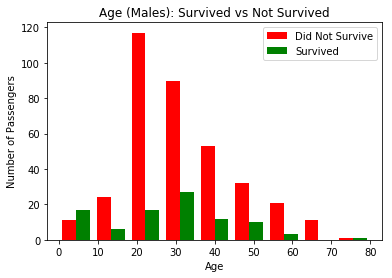

In [22]:
age_notSurvived_male = dataset['Age'].where((dataset['Survived']==0) & (dataset['Sex'] == 'male'))
age_survived_male = dataset['Age'].where((dataset['Survived']==1) & (dataset['Sex'] == 'male'))

draw_survival_histogram(age_notSurvived_male, age_survived_male, 'Age', 'Age (Males): Survived vs Not Survived')

As we expected, the histogram shows us that younger males (<= 10) tend to have the highest chance of survival.  
Similar to above, males between 20 and 60 tend to have the lowest chance of survival. 

#### Age vs Survival (Females)

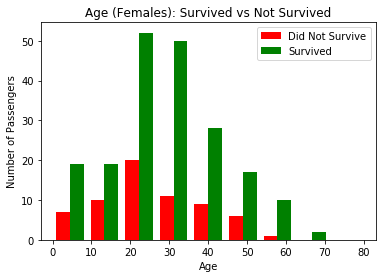

In [23]:
age_notSurvived_female = dataset['Age'].where((dataset['Survived']==0) & (dataset['Sex'] == 'female'))
age_survived_female = dataset['Age'].where((dataset['Survived']==1) & (dataset['Sex'] == 'female'))

draw_survival_histogram(age_notSurvived_female, age_survived_female, 'Age', 'Age (Females): Survived vs Not Survived')

#### Relationship Between Fare and Survival

As we saw above, we knew that females had a higher chance of survival than males.

What is interesting here is the fact that younger females didn't neccessairly have a higher chance of surviving.

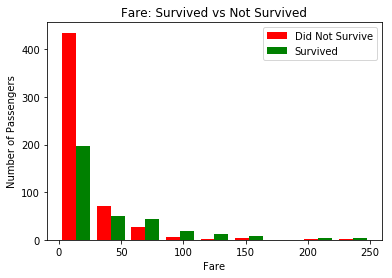

In [24]:
fare_notSurvived = dataset['Fare'].where(dataset['Survived']==0)
fare_survived = dataset['Fare'].where(dataset['Survived']==1)
fare_bins = np.linspace(0, 250, 10)

draw_survival_histogram(fare_notSurvived, fare_survived, 'Fare', 'Fare: Survived vs Not Survived', gbins = fare_bins)

Let's take a look at this graph again, after setting an upper limit on y.

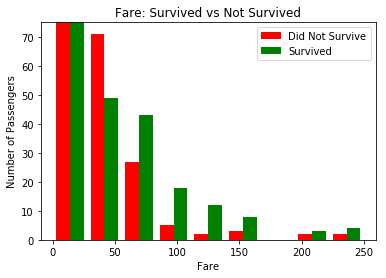

In [25]:
draw_survival_histogram(fare_notSurvived, fare_survived, 'Fare', 'Fare: Survived vs Not Survived',
                        gbins = fare_bins, ylim_top = 75)

This histogram shows that passengers with cheaper fares had lower chances of survival.

We already saw this trend when we compared Pclass and survival above.

#### Relationship Between Fare, Embarked and Survival

In [26]:
fare_notSurvived_S= dataset['Fare'].where((dataset['Survived']==0) & (dataset['Embarked'] == 'S'))
fare_survived_S = dataset['Fare'].where((dataset['Survived']==1) & (dataset['Embarked'] == 'S'))

fare_notSurvived_C= dataset['Fare'].where((dataset['Survived']==0) & (dataset['Embarked'] == 'C'))
fare_survived_C = dataset['Fare'].where((dataset['Survived']==1) & (dataset['Embarked'] == 'C'))

fare_notSurvived_Q= dataset['Fare'].where((dataset['Survived']==0) & (dataset['Embarked'] == 'Q'))
fare_survived_Q = dataset['Fare'].where((dataset['Survived']==1) & (dataset['Embarked'] == 'Q'))

#### Fare vs Survival (Embarked S)

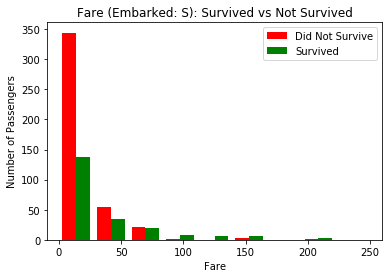

In [27]:
draw_survival_histogram(fare_notSurvived_S, fare_survived_S, 'Fare', 'Fare (Embarked: S): Survived vs Not Survived', gbins = fare_bins)

Similar to above, we will set an upper limit on y.

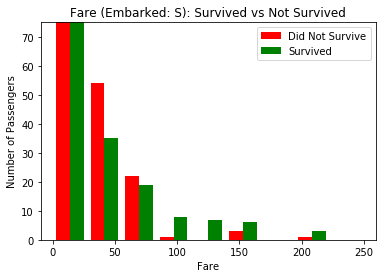

In [28]:
draw_survival_histogram(fare_notSurvived_S, fare_survived_S, 'Fare', 'Fare (Embarked: S): Survived vs Not Survived',
                        gbins = fare_bins, ylim_top = 75)

#### Fare vs Survival (Embarked C)

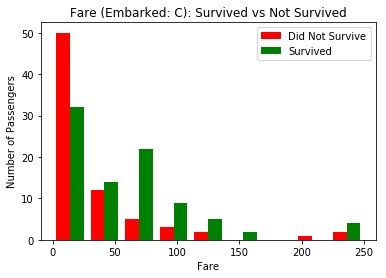

In [29]:
draw_survival_histogram(fare_notSurvived_C, fare_survived_C, 'Fare', 'Fare (Embarked: C): Survived vs Not Survived', gbins = fare_bins)

#### Fare vs Survival (Embarked Q)

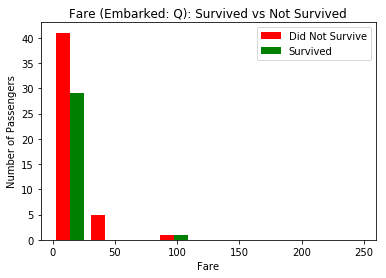

In [30]:
draw_survival_histogram(fare_notSurvived_Q, fare_survived_Q, 'Fare', 'Fare (Embarked: Q): Survived vs Not Survived', gbins = fare_bins)

Setting an upper limit on y.

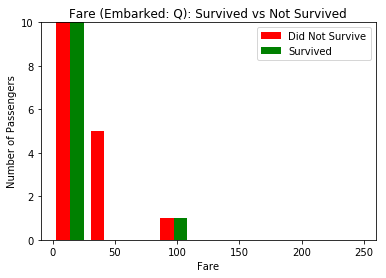

In [31]:
draw_survival_histogram(fare_notSurvived_Q, fare_survived_Q, 'Fare', 'Fare (Embarked: Q): Survived vs Not Survived',
                        gbins = fare_bins, ylim_top = 10)

We can see that for all three embarked sites, the lower passenger's fare, the lower chance of survival they have.

Interestingly, as fare goes up, embarked C seems to have the greatest increase in chances of survival, which matches our observations from above with Embarked vs Survival.

#### Relationship Between SibSp and Survival

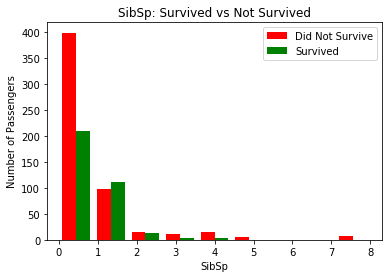

In [32]:
sibSp_notSurvived = dataset['SibSp'].where(dataset['Survived']==0)
sibSp_survived = dataset['SibSp'].where(dataset['Survived']==1)
sibSp_bins = np.linspace(0, 8, 10)


draw_survival_histogram(sibSp_notSurvived, sibSp_survived, 'SibSp', 'SibSp: Survived vs Not Survived', gbins = sibSp_bins)


Setting an upper limit on y.

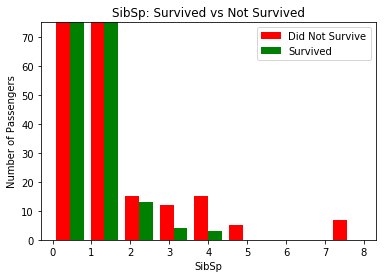

In [33]:
draw_survival_histogram(sibSp_notSurvived, sibSp_survived, 'SibSp', 'SibSp: Survived vs Not Survived',
                        gbins = sibSp_bins, ylim_top = 75)

The histogram shows that passengers with 1 sibSp has the highest chance of survival, then passengers with 2 subSp has the second highest chance. 

Moreover, the histogram shows that passengers who had no sibSp had a higher chance of surviving then those with 3 or greater. 

The trend for SibSp is that the chances of survival goes up from when SibSp equals 0 to until around SibSp equals 1-2, then goes back down again. The reason could possibly be because having one or two sibSp could've been benefitial to survival, but having more than two could have been a hindrance.

We can see the number of passengers for each of the values of sibSp that we have.

In [34]:
from collections import Counter
sibSp_counter = Counter(dataset['SibSp'])
print(sibSp_counter)

Counter({0: 608, 1: 209, 2: 28, 4: 18, 3: 16, 8: 7, 5: 5})


We can see that most passengers (608 passengers to be exact) had 0 sibSp, and then most other passengers had only 1 sibSp.

We can see the percentage of survivors among the passengers for each sibSp value (from 0 to 8) 

In [35]:
dataset[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


As we observed above, passengers with sibSp value of 1 has the highest chance of survival, then the passengers with sibSp value of 2, then those with 0 and so on.

We can confirm our observations from above as the chances of survival goes up from when SibSp equals 0 to until when SibSp equals 1-2, then begins to drop again.

#### Relationship Between Parch and Survival

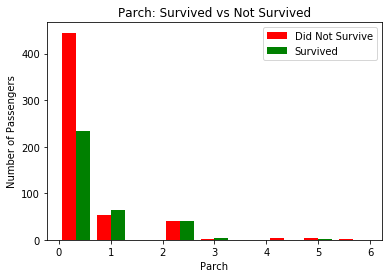

In [36]:
parch_notSurvived = dataset['Parch'].where(dataset['Survived']==0)
parch_survived = dataset['Parch'].where(dataset['Survived']==1)

parch_bins = np.linspace(0, 6, 10)


draw_survival_histogram(parch_notSurvived, parch_survived, 'Parch', 'Parch: Survived vs Not Survived', gbins = parch_bins)

Setting an upper limit on y.

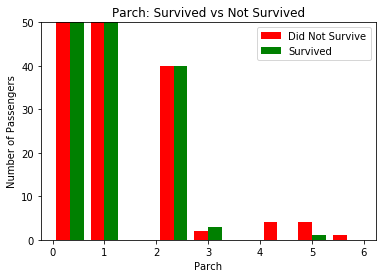

In [37]:
draw_survival_histogram(parch_notSurvived, parch_survived, 'Parch', 'Parch: Survived vs Not Survived', 
                        gbins = parch_bins, ylim_top = 50)

We can see that passengers with parch value of 3 has the highest chance of survival, however were a lot fewer passengers with a parch value of 3 then those with a parch value of 1 or 2.

Moreover, those with a parch value of 1 had a higher chance of survival than those with a parch value of >=4.

Similar to SibSp, the trend for parch is that the chances of survival goes up from when parch equals to 0 when parch is around 1-3, then goes back down again. The reason could once again (as listed in the SibSp section) be because having one to three parch could've been benefitial to survival, but having more than three could have been a hindrance.

We can see the number of passengers for each of the values of parch.

In [38]:
parch_counter = Counter(dataset['Parch'])
parch_counter

Counter({0: 678, 1: 118, 2: 80, 5: 5, 3: 5, 4: 4, 6: 1})

We can see that most passengers (678 passengers) had 0 parch (just like sipSb), and then most other passengers had only 1 parch (again similar to sipSb).

We can also see the percentage of survivors among the passengers for each parch value (from 0 to 6) 

In [39]:
dataset[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


Here, we confirm our observations from above as passengers with a parch value of 3 had the highest chances of survival, followed by those with a parch value of 1 and 2. 

Similar to SibSp, we can confirm our observations from above as the chances of survival goes up from when Parch equals 0 to until when Parch equals 1-3, then begins to drop again.

## Part 2: Feature Engineering

In this part, we will modify our features, fill in missing values, etc, in order to a model that will predict the survival outcome of passengers based on the analysis above.

We first begin by combining our train and test dataset to manipulate them at the same time.

In [40]:
# Reading test dataset
test_df = pd.read_csv('../data/test.csv')

# Combining the train and test datasets
combined_df = dataset.append(test_df)
combined_df.reset_index(inplace=True)

#### Describing the combined dataset

In [41]:
combined_df.describe()

,index,Age,Fare,NotSurvived,Parch,PassengerId,Pclass,SibSp,Survived
count,1309.000000,1046.000000,1308.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,369.478992,29.881138,33.295479,0.616162,0.385027,655.000000,2.294882,0.498854,0.383838
std,248.767105,14.413493,51.758668,0.486592,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,163.000000,21.000000,7.895800,0.000000,0.000000,328.000000,2.000000,0.000000,0.000000
50%,327.000000,28.000000,14.454200,1.000000,0.000000,655.000000,3.000000,0.000000,0.000000
75%,563.000000,39.000000,31.275000,1.000000,0.000000,982.000000,3.000000,1.000000,1.000000
max,890.000000,80.000000,512.329200,1.000000,9.000000,1309.000000,3.000000,8.000000,1.000000


As we can see, we know have 1309 rows instead of 891.

Let's see each column's datatypes are.

In [42]:
combined_df.dtypes

index            int64
Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
NotSurvived    float64
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

Now, let's check which columns have missing values.

In [43]:
combined_df.isna().any()

index          False
Age             True
Cabin           True
Embarked        True
Fare            True
Name           False
NotSurvived     True
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived        True
Ticket         False
dtype: bool

As we saw at the very beginning, Age, Cabin, Embarked and Fare all have missing values.

The columns related to survived also have missing values, which is expected because we combined the test dataset with the train dataset.

###  Name

As one can expect, the name feature by itself will not be very helpful when determining a passenger's probability of surviving.

However, all names in our dataset includes a title. A passenger's title could reflect a lot of important information, such as their age, gender, wealth, etc. Hence, we will extract passenger titles from all our passengers.

Luckily for us, all titles of passengers are seperated by a comma after their first name, making the extraction process very easy.

#### Extracting Passenger Titles

Note that there are no missing names, hence every passenger will have a title.

We will put the passenger's titles in a list to see how many of each title we have.

In [44]:
title_list = []
for name in combined_df['Name']:
    title_list.append(name.split(',')[1].split('.')[0].strip())

In [45]:
title_counter = Counter(title_list)
print(title_counter)

Counter({'Mr': 757, 'Miss': 260, 'Mrs': 197, 'Master': 61, 'Rev': 8, 'Dr': 8, 'Col': 4, 'Ms': 2, 'Major': 2, 'Mlle': 2, 'Don': 1, 'Mme': 1, 'Lady': 1, 'Sir': 1, 'Capt': 1, 'the Countess': 1, 'Jonkheer': 1, 'Dona': 1})


As one could expect, we have 'Mr' has the most frequency, followed by 'Miss', 'Mrs', and so on.

Now, lets create a set from this title_list to see how many unique titles we have in total.

In [46]:
title_set = set(title_list)
print(title_set)
print('There are', len(title_set), 'different titles.')

{'the Countess', 'Sir', 'Capt', 'Rev', 'Master', 'Mrs', 'Miss', 'Don', 'Major', 'Lady', 'Mlle', 'Jonkheer', 'Ms', 'Dona', 'Mme', 'Mr', 'Dr', 'Col'}
There are 18 different titles.


Now, we create a dictionary to map each title to a certain 'Title Group'. For example, the titles, 'Capt' and 'Col' all represent passengers who are a part of the crew, so they will be grouped together to a 'Crew' title group.

The Title Group 'SR' stands for 'Socially Respected', which includes doctors('Dr'), majors('Major'), the Countess('the Countess'), etc.  
It is reasonable to assume that passengers with a 'SR' title shares a lot of characteristics, such as (obviously) being socially respected, but they are also more likely to be older and not travelling alone. 

In [47]:
title_dict = {
        'Capt': 'Crew',
        'Col': 'Crew',
        'Mr': 'Mr',
        'Miss': 'Miss',
        'Mlle': 'Miss',
        'Mrs': 'Mrs',
        'Ms': 'Mrs',  # There is only 1
        'Mme': 'Mrs',
        'Master': 'Master',
        'Don': 'SR', # SR for Socially Respected
        'Dona': 'SR',
        'Rev': 'SR',
        'Dr': 'SR',
        'Major': 'SR',
        'Lady': 'SR',
        'Sir': 'SR',
        'the Countess': 'SR',
        'Jonkheer': 'SR'
}

We now create a 'Title' feature for every passenger

In [48]:
def get_given_title(name):
    return name.split(',')[1].split('.')[0].strip()

combined_df['Title'] = combined_df['Name'].apply(get_given_title)

combined_df['Title'] = combined_df['Title'].map(title_dict)

Checkinf if we have any missing title values.

In [49]:
combined_df.Title.isna().any()

False

We don't!

Now let's visualize the survival probabilty for each title.

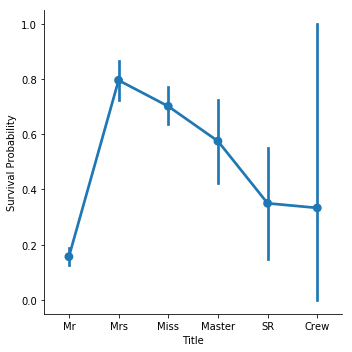

In [50]:
g = sns.factorplot(x='Title', y='Survived', data=combined_df)
g.set(xlabel='Title', ylabel='Survival Probability')

We can see that 'Mr' has the lowest survival probability, which makes sense because we know from above that males had a lower survival chance than females. Thus, titles for females('Mrs' and 'Miss') have a higher survival probability.

Interestingly enough 'SR' had a lower chance of survival, maybe due to the fact that they were generally older and had more males than females.

Lastly, the 'Crew' had a very high deviation, due to the fact that we only had 5 crew members, and some survived while others did not.

#### Dropping Name Column

We know have all the passenger titles, and unless we decide to extract other information from names, we won't need our name column anymore.  
Hence, we drop it.

In [51]:
combined_df.drop('Name', axis=1, inplace=True)

#### Hot Encoding the Title Column

To avoid ordinal ordering, we will hot encode the title column.

In [52]:
title_encoded = pd.get_dummies(combined_df['Title'], prefix = 'Title')
combined_df = pd.concat([combined_df, title_encoded], axis = 1)

#### Avoiding Collinearity

In [53]:
combined_df.drop('Title_SR', axis=1, inplace=True)

We will drop the title column later (after computing missing age values).

### Age

Remember that we have a lot of missing age values. Let's see exactly how many.

In [54]:
num_missingAge = combined_df['Age'].isna().sum()
print('We are missing', num_missingAge, 'values for Age.')

We are missing 263 values for Age.


We will now try to see which features (that don't have a lot of missing values) will be the best predictors for imputing the missing age values.

The five that we pick are Title, Pclass, Sex, Parch, and Sibsp.

#### TItle vs Age

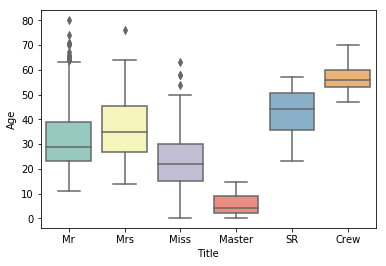

In [55]:
sns.boxplot(x='Title', y='Age', data=combined_df, palette='Set3')

Clearly, the mean age for each Title feature is different, and title is an important feature when trying to predict age.

Let's see if title combined with sex would give us important results.

#### Title, Sex vs Age

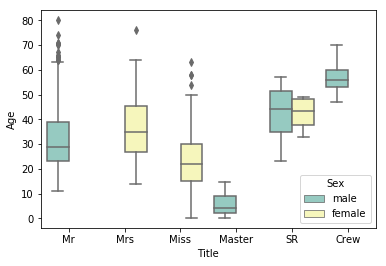

In [56]:
sns.boxplot(x='Title', y='Age', hue='Sex', data=combined_df, palette='Set3')

We can see that the Title feature already represents the sex feature for all titles, except for 'SR'.

However, for 'SR', the graph shows that the median age for both males and females is very similar, so we will not use the 'Sex' feature, since the 'Title' feature already contains the information.

#### Pclass vs Age

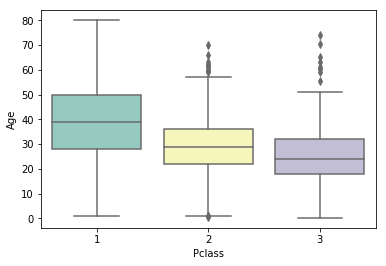

In [57]:
sns.boxplot(x='Pclass', y='Age', data=combined_df, palette='Set3')

We can clearly see that the median age amongst the different Pclasses are different.

Once again, Pclass is an important feature when trying to determine missing age.

Let's see whether or not if Pclass when combined with Title will be important when trying to predict missing age values.

#### Title, Pclass vs Age

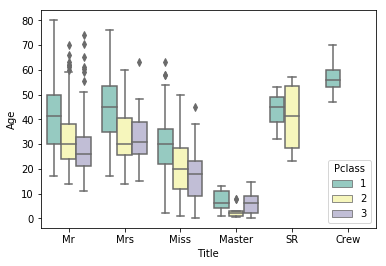

In [58]:
sns.boxplot(x='Title', y='Age', hue='Pclass', data=combined_df, palette='Set3')

We can clearly see that the median age for each title differs (sometimes significantly) depending on the Pclass. So we will definitely combine Pclass and Title when trying to impiute missing age values.

#### Parch vs Age

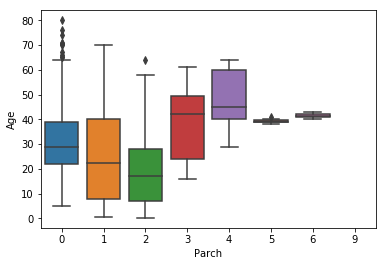

In [59]:
sns.boxplot(x='Parch', y='Age', data=combined_df)

Once again, the median age differs significantly depending on the values of Parch. Thus, we will combine Parch with Title and Pclass, when trying to impute missing age values,.

This makes sense, as passengers with lower values of Parch (number of parents and children) will most likely be in their early 20's to mid to late 30's.

#### SibSp vs Age

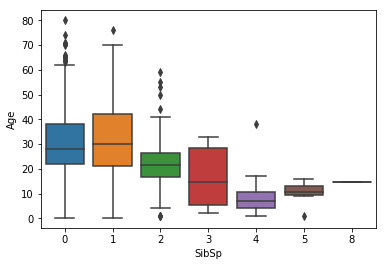

In [60]:
sns.boxplot(x='SibSp', y='Age', data=combined_df)

Similar to Parch, the median age differs significantly dependong on the values of SibSp. Once again, we wil combine SibSp, along with Parch, Title and Pclass when imputing missing age values.

However, there are very few passengers with high values for Parch and SibSp. Therefore, using all the values for both Parch and SibSp could lead to overfitting. To overcome this, we will create groups of sizes, Small, Medium and Large, for both Parch and SibSp.

In [61]:
def assign_ParchSibSpGroup(num):
    group = ''
    
    if num <= 1:
        group = 'Small'
    elif 2 <= num <= 4:
        group = 'Medium'
    else:
        group = 'Large'
        
    return group
        
combined_df['ParchGroup'] = combined_df['Parch'].map(assign_ParchSibSpGroup)
combined_df['SibSpGroup'] = combined_df['SibSp'].map(assign_ParchSibSpGroup)

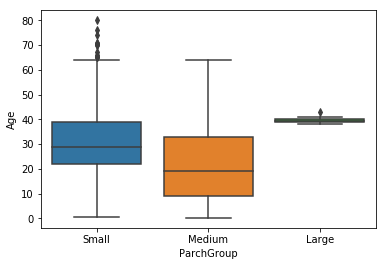

In [62]:
sns.boxplot(x='ParchGroup', y='Age', data=combined_df)

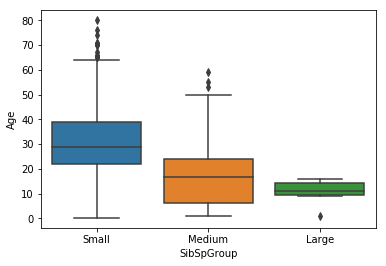

In [63]:
sns.boxplot(x='SibSpGroup', y='Age', data=combined_df)

Clearly, for both Parch and SibSp, the median age for each size group differ significantly. Hence, using these size groups for both Parch and SibSP will allow us to make more accurate predictions for the missing age values, however will allow us to avoid overfitting.

We now fill in the missing age values.

We will do this by for every passenger who are missing their age value, we will fill in this missing value with the median age amongst all the other passengers with the same Title, Pclass, Parch Group and SibSP group. We could still have missing age values after this step as there could be passengers with missing age values without another passenger with the same Title, Pclass, Parch, and SibSp.

In [64]:
grouped = combined_df.groupby(['ParchGroup','SibSpGroup','Pclass', 'Title'])  
grouped.Age.median()

combined_df.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

Let's check if we have any missing age values now.

In [65]:
combined_df['Age'].isna().sum()

0

We don't! 

Fortunately, all the missing age values are accounted for using this method (meaning all passengers with missing age values have at least one other passenger with the same Title, Pclass, Parch Group, and SibSP group.

We will now drop the original Title column since we won't use it anymore.

We will also drop the SibSpGroup and ParchGroup columns since we won't need it anymore.

In [66]:
combined_df.drop('Title', axis=1, inplace=True)
combined_df.drop('SibSpGroup', axis=1, inplace=True)
combined_df.drop('ParchGroup', axis=1, inplace=True)

We are done processing age.

## Sex

We will first see if Sex has any missing values.

In [67]:
combined_df['Sex'].isna().sum()

0

Luckly, there are no missing values for Sex.

Since we only have one column, there is no need to hot encode.

We will set 'male' = 1 and 'female' = 0.

In [68]:
combined_df['Sex'] = combined_df['Sex'].map(lambda a:1 if a == 'male' else 0)

We are done processing Sex.

## Processing New Feature: Family (from SibSp and Parch)

Let's first check for any missing values for SibSp and Parch.

In [69]:
combined_df['SibSp'].isna().sum()

0

In [70]:
combined_df['Parch'].isna().sum()

0

We don't have any!

As we mentioned above, SibSp and Parch values follow a very similar trend when compared to chances of survival. 

Moreover, there are very few passengers with higher value of SibSp and Parch, which could lead to overfitting. 

Since the features SibSp and Parch both follow a similar trend, we will combine these two to create a new feature, FamilySize, where FamilySize = SibSp + Parch + 1

Creating the 'Family Size' column

In [71]:
combined_df['FamilySize'] = combined_df['SibSp'] + combined_df['Parch'] + 1

Let's now look at the ranges of FamilySize and their count.

In [72]:
familySize_counter = Counter(combined_df['FamilySize'])
print(familySize_counter)

Counter({1: 790, 2: 235, 3: 159, 4: 43, 6: 25, 5: 22, 7: 16, 11: 11, 8: 8})


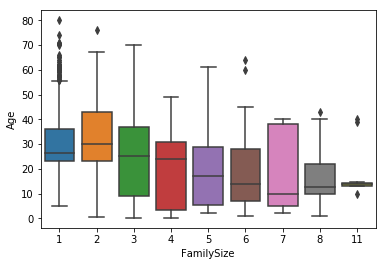

In [73]:
sns.boxplot(x='FamilySize', y='Age', data=combined_df)

We can see that the higher the FamilySize, the lower the median age.

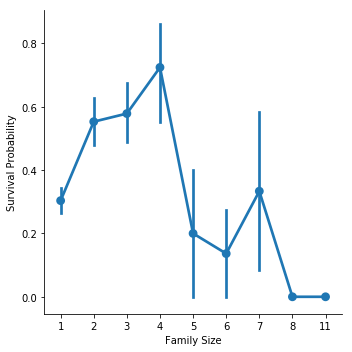

In [74]:
g = sns.factorplot(x='FamilySize', y='Survived', data=combined_df)
g.set(xlabel='Family Size', ylabel='Survival Probability')

From the graph above, we can see that there is a significant drop in survival probability as we go from 4 to 5.

This could be due to the fact that having up to 4 could be benefitial to survival, but more than 4 could lead to more hindrance.

Also, since there are very few passengers with very large FamilySizes, we will create groups of various family sizes to avoid overfitting.

#### Creating FamilySize Groups

We create the groups with the following ranges:
- Solo (FamilySize == 0)
- Small (FamilySize == 2)
- Medium (3 <= FamilySize <= 4)
- Large (5 <= FamilySize <= 7)
- Very Large (FamilySize >= 8)

In [75]:
combined_df['Solo'] = combined_df['FamilySize'].map(lambda a:1 if a == 1 else 0)
combined_df['Family_S'] = combined_df['FamilySize'].map(lambda a:1 if a == 2 else 0)
combined_df['Family_M'] = combined_df['FamilySize'].map(lambda a:1 if 3 <= a <= 4 else 0)
combined_df['Family_L'] = combined_df['FamilySize'].map(lambda a:1 if 5 <= a <= 7 else 0)
combined_df['Family_VL'] = combined_df['FamilySize'].map(lambda a:1 if a >= 8 else 0)

#### Analyzing FamilySize Groupings and Survived

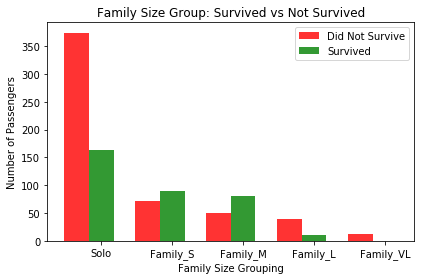

In [76]:
n_groups = 5
solo_notSurvived = len(combined_df[(combined_df['Solo'] == 1) & (combined_df['Survived'] == 0)])
solo_survived = len(combined_df[(combined_df['Solo'] == 1) & (combined_df['Survived'] == 1)])

fs_notSurvived = len(combined_df[(combined_df['Family_S'] == 1) & (combined_df['Survived'] == 0)])
fs_survived = len(combined_df[(combined_df['Family_S'] == 1) & (combined_df['Survived'] == 1)])

fm_notSurvived = len(combined_df[(combined_df['Family_M'] == 1) & (combined_df['Survived'] == 0)])
fm_survived = len(combined_df[(combined_df['Family_M'] == 1) & (combined_df['Survived'] == 1)])

fl_notSurvived = len(combined_df[(combined_df['Family_L'] == 1) & (combined_df['Survived'] == 0)])
fl_survived = len(combined_df[(combined_df['Family_L'] == 1) & (combined_df['Survived'] == 1)])

fvl_notSurvived = len(combined_df[(combined_df['Family_VL'] == 1) & (combined_df['Survived'] == 0)])
fvl_survived = len(combined_df[(combined_df['Family_VL'] == 1) & (combined_df['Survived'] == 1)])


family_notSurvived_ = (solo_notSurvived, fs_notSurvived, fm_notSurvived, fl_notSurvived, fvl_notSurvived)
family_survived = (solo_survived, fs_survived, fm_survived, fl_survived, fvl_survived)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, family_notSurvived_, bar_width,
alpha=opacity,
color='red',
label='Did Not Survive')

rects2 = plt.bar(index + bar_width, family_survived, bar_width,
alpha=opacity,
color='green',
label='Survived')

plt.xlabel('Family Size Grouping')
plt.ylabel('Number of Passengers')
plt.title('Family Size Group: Survived vs Not Survived')
plt.xticks(index + bar_width, ('Solo', 'Family_S', 'Family_M', 'Family_L', 'Family_VL'))
plt.legend()

plt.tight_layout()
plt.show()

Clearly, the Family Size group has an impact on the chances of survival.

Hence, we will keep the Family Size feature.

#### Avoiding Collinearity

In [77]:
combined_df.drop('Family_VL', axis=1, inplace=True)

#### Dropping the Original FamilySize Column

In [78]:
combined_df.drop('FamilySize', axis=1, inplace=True)

#### Dropping original SibSp and Parch columns

In [79]:
combined_df.drop('SibSp', axis=1, inplace=True)
combined_df.drop('Parch', axis=1, inplace=True)

## Pclass

Let's check for any missing values for Pclass.

In [80]:
combined_df['Pclass'].isna().sum()

0

There are no missing values for Pclass.

#### Hot Encoding Pclass Column

To avoid ordinal ordering, we will hot encode the Pclass column.

In [81]:
pclass_encoded = pd.get_dummies(combined_df['Pclass'], prefix = 'Pc')
combined_df = pd.concat([combined_df, pclass_encoded], axis = 1)

#### Avoiding Collinearity

In [82]:
combined_df.drop('Pc_3', axis=1, inplace=True)

#### Dropping the Original Pclass Column

In [83]:
combined_df.drop('Pclass', axis=1, inplace=True)

In [84]:
## Embarked

Let's see how many missing values we have for Embarked.

In [85]:
combined_df['Embarked'].isna().sum()

2

We have 2 missing entries. 

Since we only have two, we will replace these two with the most frequent (mode).

In [86]:
embarked_mode = combined_df['Embarked'].mode()[0]
print('The most frequent value of Embarked is:', embarked_mode)

The most frequent value of Embarked is: S


Replacing the Missing Embarked values

In [87]:
combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0], inplace=True)

#### Hot Encoding Embarked Column

To avoid ordinal ordering, we will hot encode the Embarked column.

In [88]:
embkarked_encoded= pd.get_dummies(combined_df['Embarked'], prefix = 'Emb')
combined_df = pd.concat([combined_df, embkarked_encoded], axis = 1)

#### Avoiding Collinearity

In [89]:
combined_df.drop('Emb_S', axis=1, inplace=True)

#### Dropping the ORiginal Pclass Column

In [90]:
combined_df.drop('Embarked', axis=1, inplace=True)

## Cabin

#### Checking for missing values under the Cabin column

In [91]:
combined_df['Cabin'].isna().sum()

1014

We have a lot of missing Cabin data.

In [92]:
missing_cabin_p = round(1014/1309 * 100,2)
print('Around',missing_cabin_p,'% of Cabin data is missing')

Around 77.46 % of Cabin data is missing


Imputing these 1014 of missing cabin values could lead to overfitting and misleading results.
We still want to extract information from the Cabin information instead of just dropping the columns.
Hence, we will try to take out as much information as we can from Cabin, but not fill the missing values.

#### We first take a look at the survivors with and without cabin values.

We first define a new column (just for graphing purposes), called CabinNA which is equal to 1 if the passenger is missing the cabin value, and equal to 0 otherwise.

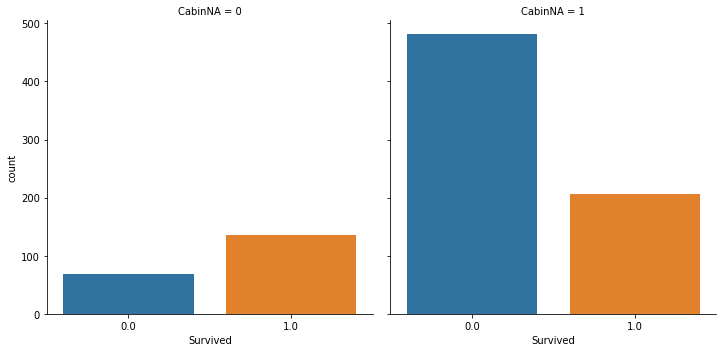

In [93]:
combined_df['CabinNA'] = combined_df['Cabin'].map(lambda a:1 if pd.isna(a) else 0)
cabin_train = combined_df.iloc[:891]
sns.catplot(x='Survived', col='CabinNA', kind='count', data=cabin_train)

We can clearly see that the passengers who are missing cabin values have a significantly lower chance of surviving.

To get a better look at thus, we compute the survived percentages of each group, and also graph the ratio.

,Survived
CabinNA,
0,0.666667
1,0.299854


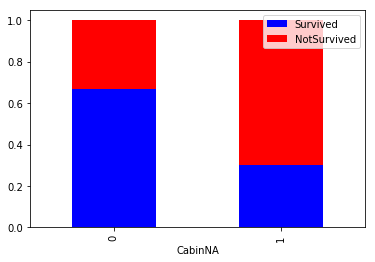

In [94]:
cabin_train.groupby('CabinNA').agg('mean')[['Survived', 'NotSurvived']].plot(kind='bar', stacked=True, colors = ['b', 'r'])
cabin_train[['CabinNA', 'Survived']].groupby(['CabinNA']).mean().sort_values(by='Survived', ascending=False)

Again, we can see people no cabin information is less likely to survive. 

Although this is a very weird observation, one person online suggested that cabin information was found on someone in Pclass 1 who only had cabin information for Pclass 1 passengers and Pclass 1 passengers had a higher chance of survival.

From this, we can carefully interpret that passengers without cabin information were more likely to be in lower Pclasses, which could result in them having lower chances of survival.

Now, the first letter of each cabin name represents the deck the passengers were in, which could be vital information. Therefore, we will extract the first letter of each cabin name for every passenger that has a cabin name. 

However, as we saw above, having no cabin name is less likely to survive, which is another vital piece of information. Therefore, we will also label those without cabin information as NA, and include this information in our model.

#### Taking the First Letter of Each Cabin Name and Filling missing values with NA's

In [95]:
combined_df['Cabin'] = combined_df['Cabin'].str[0]
combined_df.fillna({'Cabin': 'NA'}, inplace=True)

Let's see the different values for Cabin, and also their count.

In [96]:
cabin_counter = Counter(combined_df['Cabin'])
print(cabin_counter)

Counter({'NA': 1014, 'C': 94, 'B': 65, 'D': 46, 'E': 41, 'A': 22, 'F': 21, 'G': 5, 'T': 1})


#### Hot Encoding Cabin Column

To avoid ordinal ordering, we will hot encode the Cabin column.

In [97]:
cabin_encoded= pd.get_dummies(combined_df['Cabin'], prefix = 'Cabin')
combined_df = pd.concat([combined_df, cabin_encoded], axis = 1)

#### Avoiding Collinearity

In [98]:
combined_df.drop('Cabin_T', axis=1, inplace=True)

#### Dropping the Original Cabin Column 

In [99]:
combined_df.drop('Cabin', axis=1, inplace=True)